## Problem Statement 2
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


> ### 1. Business Problem
1.1 What is the business objective?
- To analyze whether there is a significant difference in the average Turn Around Time (TAT) for medical reports among the four laboratories listed as preferred by the hospital.

1.2 Are there any constraints?
- Data Availability: Ensuring an adequate sample size from each laboratory.
- Assumptions: Assuming that the samples are independent and the data is randomly collected.
- Significance Level: The analysis will be conducted at a 5% significance level (α = 0.05).
- Operational Impact: If a significant difference is found, it could lead to changes in the hospital's preferred laboratory list.


> ### 2. Data Dictionary
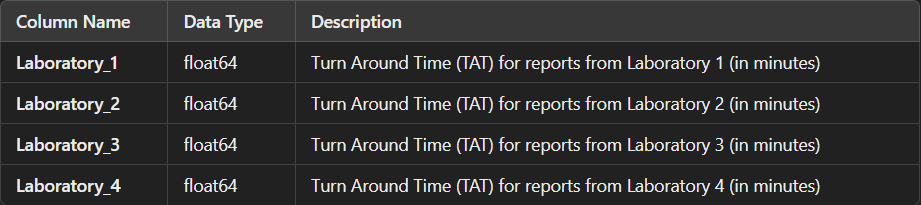

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("lab_tat_updated.csv")
df.head()

,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


> ### 3. EDA

In [3]:
df.describe()

,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
count,120.000000,120.000000,120.000000,120.00000
mean,178.257333,178.902917,200.210167,163.68275
std,13.919668,14.957114,15.794801,15.08508
min,140.250000,140.550000,170.580000,124.06000
25%,170.267500,168.025000,190.182500,154.05000
50%,179.055000,178.870000,198.610000,164.42500
75%,187.222500,189.112500,211.197500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [4]:
df.isnull().sum()

Laboratory_1    0
Laboratory_2    0
Laboratory_3    0
Laboratory_4    0
dtype: int64

c:\Users\gaikw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gaikw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gaikw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gaikw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: >

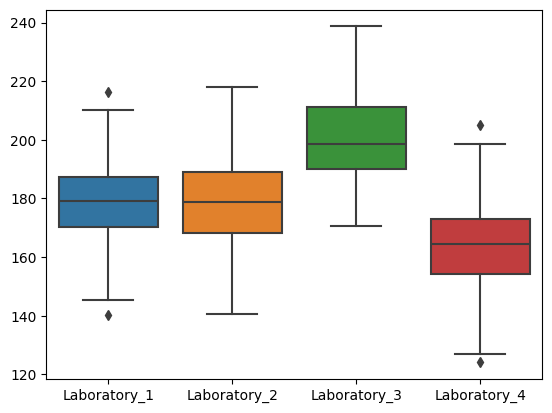

In [6]:
sns.boxplot(df)

In [7]:
#Very few outliers, can be ignored

In [8]:
df.duplicated().sum()

0

In [19]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu,f_oneway

In [10]:
#Normality Test using Shapiro-Wilk Test
#Null Hypothesis (H0): Data is normally distributed
#Alternative Hypothesis (H1): Data is not normally distributed

In [12]:
stat_1, p_1 = shapiro(df['Laboratory_1'])
stat_2, p_2 = shapiro(df['Laboratory_2'])
stat_3, p_3 = shapiro(df['Laboratory_3'])
stat_4, p_4 = shapiro(df['Laboratory_4'])

In [13]:
print("\nShapiro-Wilk Test Results:")
print(f"Laboratory_1: Test Statistic = {stat_1}, p-value = {p_1}")
print(f"Laboratory_2: Test Statistic = {stat_2}, p-value = {p_2}")
print(f"Laboratory_3: Test Statistic = {stat_3}, p-value = {p_3}")
print(f"Laboratory_4: Test Statistic = {stat_4}, p-value = {p_4}")


Shapiro-Wilk Test Results:
Laboratory_1: Test Statistic = 0.9886695146560669, p-value = 0.4232051372528076
Laboratory_2: Test Statistic = 0.9936320185661316, p-value = 0.8637352585792542
Laboratory_3: Test Statistic = 0.9796065092086792, p-value = 0.06546738743782043
Laboratory_4: Test Statistic = 0.9913760423660278, p-value = 0.6619619131088257


In [14]:
#All p values are greater than 0.05, therefore we fail to reject the null hypothesis
#The data is normally distributed

In [15]:
# Variance Homogeneity Test using Levene’s Test
# Null Hypothesis (H0): Equal variances
# Alternative Hypothesis (H1): Unequal variances

In [16]:
stat_var, p_var = levene(df['Laboratory_1'], df['Laboratory_2'],df['Laboratory_3'],df['Laboratory_4'])

In [17]:
print("\nLevene’s Test for Equal Variances:")
print(f"Test Statistic = {stat_var}, p-value = {p_var}")


Levene’s Test for Equal Variances:
Test Statistic = 1.025294593220823, p-value = 0.38107781677304564


In [18]:
#Test Statistic: 1.02529
#p-value: 0.381077
#Since the p-value is greater than 0.05, we fail to reject the null hypothesis of Levene’s Test.
#Conclusion: The variances of the cutlet diameters for Unit A and Unit B are equal.

In [22]:
#Null Hypothesis (H0) : there is no significant difference in average TAT among the laboratories.
#Alternate Hypothesis (H1) : there is a significant difference in average TAT among the laboratories.

In [20]:
#One-Way ANOVA
anova_stat, anova_p = f_oneway(df['Laboratory_1'], df['Laboratory_2'], df['Laboratory_3'], df['Laboratory_4'])

In [21]:
print(f"Test Statistic = {anova_stat}, p-value = {anova_p}")

Test Statistic = 121.39264646442368, p-value = 2.143740909435053e-58


In [23]:
#p-value: 2.14e-58 (very small)
#Since the p-value is less than 0.05, we reject the null hypothesis
#there is a significant difference in average TAT among the laboratories.

In [24]:
!git add labTAT.ipynb
!git commit -m "Added solution for problem statement 2"
!git push

[main 76bf8a0] Added solution for problem statement 2
 1 file changed, 576 insertions(+), 1 deletion(-)


To https://github.com/parth-gz/Data-Science-Assignments
   2f2a60c..76bf8a0  main -> main
